<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 7 columns):
Survived    183 non-null int64
Pclass      183 non-null int64
Sex         183 non-null object
Age         183 non-null float64
SibSp       183 non-null int64
Parch       183 non-null int64
Fare        183 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 11.4+ KB
None
[1 0]
['female' 'male']
Cross validation score with 5 fold cross validation:  0.805952380952381
             precision    recall  f1-score   support

       Died       0.50      0.71      0.59         7
   Survived       0.92      0.83      0.87        29

avg / total       0.84      0.81      0.82        36

precision: [0.80555556 0.92307692 1.        ], recall: [1.         0.82758621 0.        ], threshold: [0 1]
average_precision_score:  0.9028146183318597


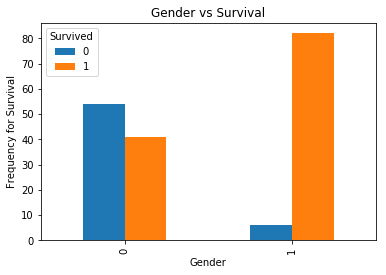

In [20]:
#Loading​ ​Data​ ​and​ ​modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic.columns = \
['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

#Dropping na values
titanic = titanic.dropna()
#Dropping unneccessary columns

titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis = 1, inplace = True)
print(titanic.info())
print(titanic['Survived'].unique())
print(titanic['Sex'].unique())


titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})

pd.crosstab(titanic['Sex'],titanic['Survived']).plot(kind='bar')
plt.title('Gender vs Survival')
plt.xlabel('Gender')
plt.ylabel('Frequency for Survival')
plt.savefig('Gender vs Survival')


#Store the labels separately
survived = titanic['Survived']
titanic.drop('Survived', axis = 1, inplace = True)

scaler = preprocessing.StandardScaler().fit(titanic)
titanic_scaled = scaler.transform(titanic)

train_x, test_x, train_y, test_y = train_test_split(titanic_scaled, survived, test_size = titanic.shape[0] //5, random_state = 0)

lgr = LogisticRegression()
model = lgr.fit(train_x, train_y)
pred_y = lgr.predict(test_x)

print("Cross validation score with 5 fold cross validation: ", cross_val_score(lgr, test_x, test_y, cv = 5).mean())

target_names = ['Died', 'Survived']
print(classification_report(test_y, pred_y, target_names=target_names))
precision, recall, threshold = precision_recall_curve(test_y, pred_y)
print("precision: {}, recall: {}, threshold: {}".format(precision  ,recall, threshold))
print("average_precision_score: ", average_precision_score(test_y, pred_y))      

